In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/reshape_pass_5/detections.csv')

In [3]:
df

,image_name,detection_score,label,xmin,ymin,xmax,ymax
0,ama_2024-06-14_21_00_03.jpg,0.663556,not_moth,4420,1420,4611,1623
1,ama_2024-06-14_21_00_03.jpg,0.254534,not_moth,2,5672,525,6241
2,ama_2024-06-14_21_10_03_extra.jpg,0.748756,not_moth,1260,5303,1705,5770
3,ama_2024-06-14_21_10_03_extra.jpg,0.261633,not_moth,1,5672,523,6238
4,ama_2024-06-14_21_20_03_extra.jpg,0.757901,not_moth,2763,4445,3047,5021
...,...,...,...,...,...,...,...
10419,syd_2024-10-21_23_58_03.jpg,0.251432,not_moth,20,5794,9097,6930
10420,syd_2024-10-21_23_58_03.jpg,0.248276,not_moth,8687,5644,9145,5953
10421,syd_2024-10-21_23_58_03.jpg,0.226328,moth,6118,3588,6197,3710
10422,syd_2024-10-21_23_58_03.jpg,0.218116,not_moth,637,5977,8901,6933


In [25]:
#parse from image_name year, month, day, and  time
df['year'] = df['image_name'].str.split('_').str[1]
#rest of string is time
df['time'] = df['image_name'].str.split('_').str[2] + '_' + df['image_name'].str.split('_').str[3] + '_' + df['image_name'].str.split('_').str[4]
#remove .jpg
df['time'] = df['time'].str.replace('.jpg', '')

In [26]:
df

,image_name,detection_score,label,xmin,ymin,xmax,ymax,year,time
0,ama_2024-06-14_21_00_03.jpg,0.663556,not_moth,4420,1420,4611,1623,2024-06-14,21_00_03
1,ama_2024-06-14_21_00_03.jpg,0.254534,not_moth,2,5672,525,6241,2024-06-14,21_00_03
2,ama_2024-06-14_21_10_03_extra.jpg,0.748756,not_moth,1260,5303,1705,5770,2024-06-14,21_10_03
3,ama_2024-06-14_21_10_03_extra.jpg,0.261633,not_moth,1,5672,523,6238,2024-06-14,21_10_03
4,ama_2024-06-14_21_20_03_extra.jpg,0.757901,not_moth,2763,4445,3047,5021,2024-06-14,21_20_03
...,...,...,...,...,...,...,...,...,...
10419,syd_2024-10-21_23_58_03.jpg,0.251432,not_moth,20,5794,9097,6930,2024-10-21,23_58_03
10420,syd_2024-10-21_23_58_03.jpg,0.248276,not_moth,8687,5644,9145,5953,2024-10-21,23_58_03
10421,syd_2024-10-21_23_58_03.jpg,0.226328,moth,6118,3588,6197,3710,2024-10-21,23_58_03
10422,syd_2024-10-21_23_58_03.jpg,0.218116,not_moth,637,5977,8901,6933,2024-10-21,23_58_03


In [39]:
df_counts = df.groupby(['image_name','time']).size().to_frame(name='counts')
#save image_nameand time as counts
df_counts = df_counts.reset_index()

In [40]:
df_counts

,image_name,time,counts
0,ama_2024-06-14_21_00_03.jpg,21_00_03,2
1,ama_2024-06-14_21_10_03_extra.jpg,21_10_03,2
2,ama_2024-06-14_21_20_03_extra.jpg,21_20_03,5
3,ama_2024-06-14_21_30_03.jpg,21_30_03,6
4,ama_2024-06-14_21_40_03_extra.jpg,21_40_03,3
...,...,...,...
1280,syd_2024-10-21_23_20_03_extra.jpg,23_20_03,3
1281,syd_2024-10-21_23_30_03.jpg,23_30_03,4
1282,syd_2024-10-21_23_40_03_extra.jpg,23_40_03,7
1283,syd_2024-10-21_23_50_03_extra.jpg,23_50_03,7


In [41]:
#write this to csv
df_counts.to_csv('/work/pi_mrobson_smith_edu/mothitor/code_main/efficientnet_data/reshape_pass_5/detections_metadata.csv', index=False)

In [46]:
#find average detections per time
time_counts= df_counts.groupby(['time']).mean(numeric_only=True)

In [55]:
time_counts = time_counts.reset_index()

In [56]:
#reformat time column with : instead of _
time_counts['time'] = time_counts['time'].str.replace('_', ':')

In [57]:
time_counts

,time,counts
0,21:00:02,4.000000
1,21:00:03,5.096154
2,21:00:04,4.500000
3,21:10:03,5.402985
4,21:10:04,4.000000
5,21:20:03,5.885246
6,21:20:04,4.833333
7,21:30:03,7.062500
8,21:30:04,5.000000
9,21:40:03,6.854839


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

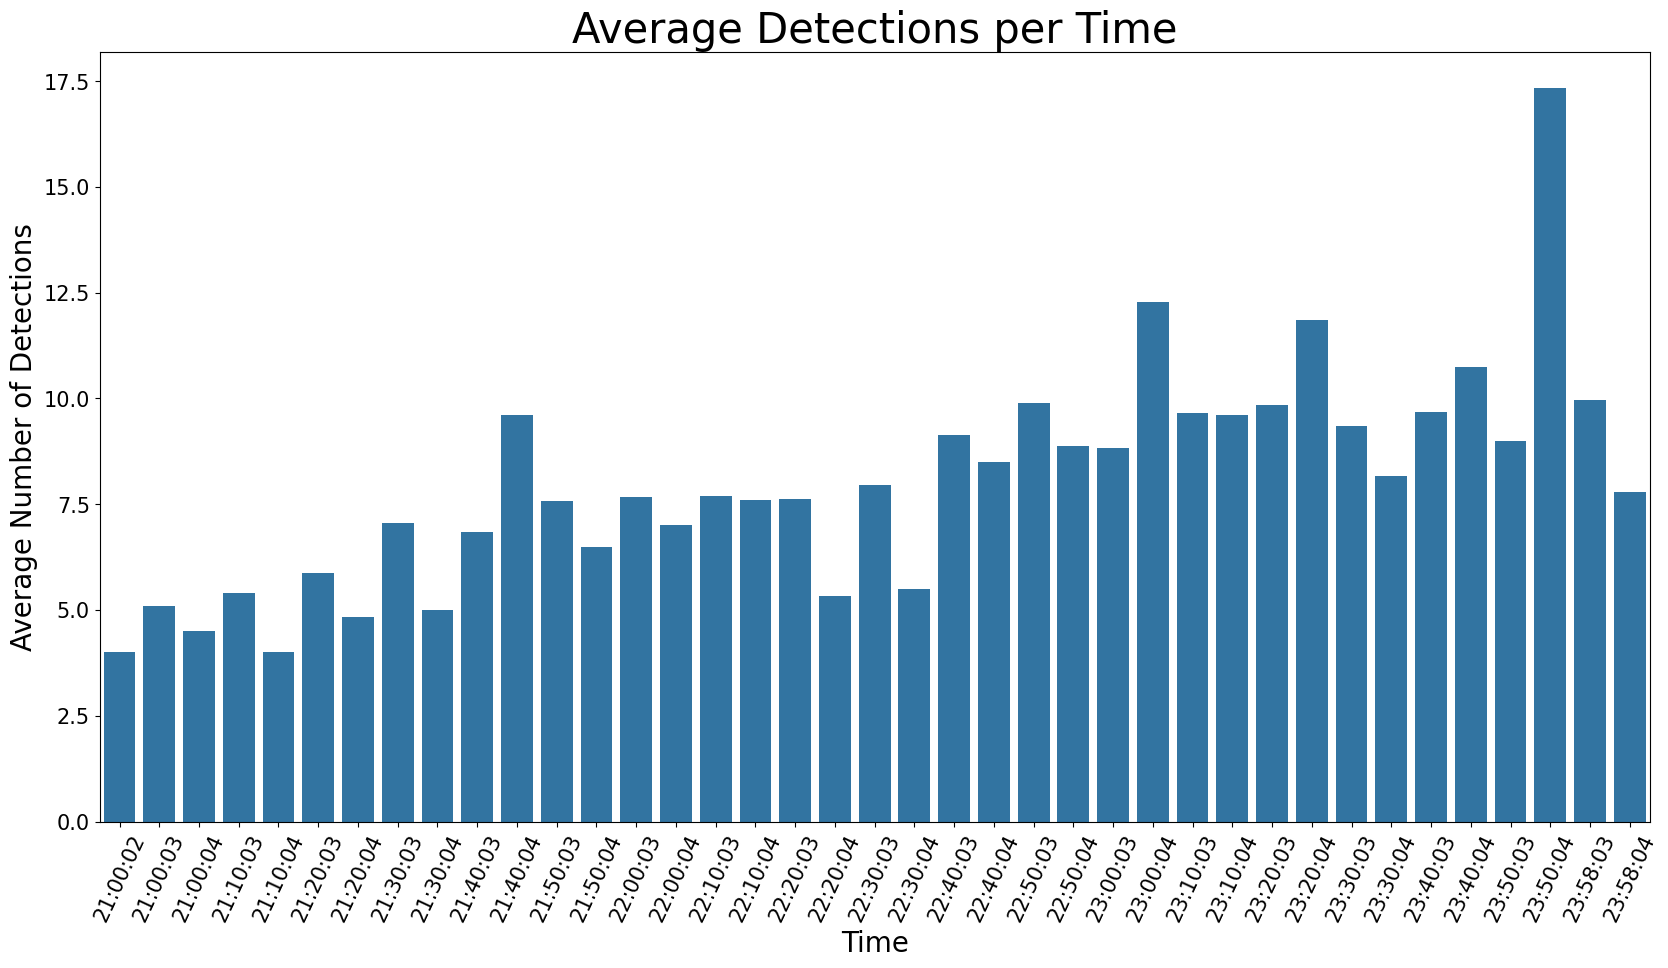

In [64]:
#put as barplot timecounts
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x='time', y='counts', data=time_counts)
plt.title('Average Detections per Time', size=30)
plt.xlabel('Time', size=20)
plt.xticks(rotation=65, size=15)
plt.ylabel('Average Number of Detections', size=20)
plt.yticks(size=15)
